Physics AM code


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Given data
totalMass = 1  # kg, total mass of the rocket
dryMass = 0.906  # kg, mass of the rocket without fuel
burnTime = 3.4  # seconds, duration of the rocket motor burn
totalImpulse = 49.6  # N*s, total impulse provided by the motor
propellantMass = 0.064  # kg, mass of the propellant

# Calculated values
averageThrust = totalImpulse / burnTime  # N, average thrust produced by the motor
massFlowRate = propellantMass / burnTime  # kg/s, rate at which the propellant is consumed


We start by importing necessary libraries (numpy for numerical operations and matplotlib.pyplot for plotting).
We define the given data for the rocket, including the total mass, dry mass, burn time, total impulse, and propellant mass.
We calculate the average thrust and mass flow rate based on the given data.

In [ ]:
# Time array
time = np.linspace(0, 10, 1000)  # 1000 points for smoother curves

# Find index where burn time ends
index = np.searchsorted(time, burnTime)

# Thrust array
thrust = np.append(np.repeat(averageThrust, index), np.repeat(0, len(time) - index))


We create a time array using np.linspace to cover 10 seconds with 1000 points, ensuring smooth curves.
We find the index where the burn time ends using np.searchsorted.
We define the thrust profile, where thrust is constant during the burn time and zero afterward.

In [ ]:
# Mass array
mass = np.append(totalMass - np.linspace(0, burnTime, index) * massFlowRate, np.repeat(dryMass, len(time) - index))

# Acceleration array (including gravity)
acceleration = thrust / mass - 9.81


We calculate the mass of the rocket over time, decreasing during the burn time as the propellant is consumed, and remaining constant (dry mass) after the burn time.
We calculate the acceleration by dividing the thrust by the mass and subtracting the acceleration due to gravity (9.81 m/s²).

In [ ]:
# Integrate function to calculate velocity and position
def integrateGraph(time, array):
    resArray = [0]
    for n in range(0, len(time)-1):
        resArray.append(resArray[-1] + 0.5*(array[n+1] + array[n])*(time[n+1] - time[n]))
    return np.array(resArray)

# Calculate velocity
velocity = integrateGraph(time, acceleration)


We define a function integrateGraph to numerically integrate an array (e.g., acceleration) over time using the trapezoidal rule.
We use this function to calculate the velocity from the acceleration array.

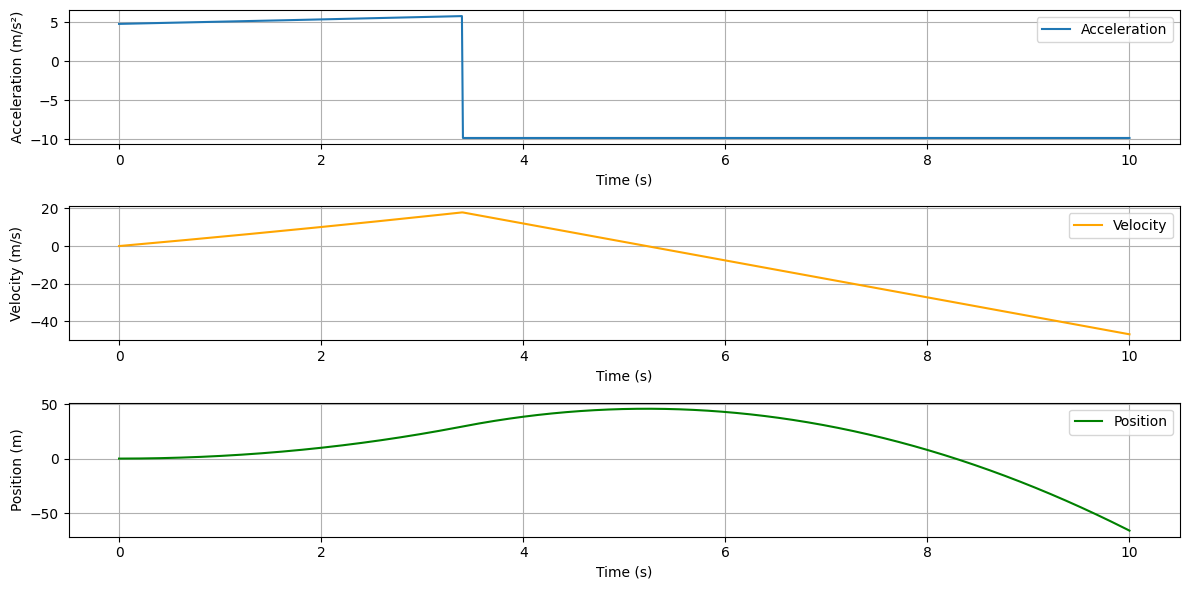

In [ ]:
# Calculate position
position = integrateGraph(time, velocity)

# Plot acceleration
plt.figure(figsize=(12, 6))
plt.subplot(3, 1, 1)
plt.plot(time, acceleration, label="Acceleration")
plt.ylabel("Acceleration (m/s²)")
plt.xlabel("Time (s)")
plt.legend()
plt.grid(True)

# Plot velocity
plt.subplot(3, 1, 2)
plt.plot(time, velocity, label="Velocity", color='orange')
plt.ylabel("Velocity (m/s)")
plt.xlabel("Time (s)")
plt.legend()
plt.grid(True)

# Plot position
plt.subplot(3, 1, 3)
plt.plot(time, position, label="Position", color='green')
plt.ylabel("Position (m)")
plt.xlabel("Time (s)")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

We calculate the position by integrating the velocity array.
We create plots for acceleration, velocity, and position, each on separate subplots, with labels and grids for better readability.

**Challenge Time: **

Create the best-performing rocket by adjusting certain variables. Your rocket's performance will be evaluated based on its maximum altitude, total flight time, and other criteria you set.

*Rules:*
You can only modify specific variables (e.g., total mass, propellant mass, burn time).
The rocket must be stable and reach a maximum altitude without crashing too soon.

*Evaluation Criteria:*

**Maximum Altitude:** The highest point the rocket reaches.
**Total Flight Time:** The time the rocket stays in the air.
**Smooth Flight Profile: **The rocket should not have excessive acceleration or abrupt changes.

*Tips:*
Consider the trade-offs between mass and thrust.
A longer burn time can lead to higher altitude but requires more propellant.
Ensure your rocket is stable throughout the flight.

HINT HINT: Knowing what the values for maximum altitude and total flight time are might be helpful, how might you get those to values to *print*?
